In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf


In [ ]:
patient_221 = pd.read_csv('/content/drive/MyDrive/221.csv')
patient_221.head()

,RESP,BP-S,BP-D,SpO2,HR,PULSE,Anomaly
0,28,81,120,98,74,73,0
1,29,81,120,98,74,73,0
2,30,81,120,98,74,73,0
3,30,81,120,99,74,73,0
4,29,81,120,99,73,73,0


In [ ]:
patient_230=pd.read_csv('/content/drive/MyDrive/230.csv')
patient_230.head()

,RESP,BP-S,BP-D,SpO2,HR,PULSE,Anomaly
0,15,54,73,97,72,71,0
1,15,54,73,97,72,71,0
2,15,54,73,97,72,71,0
3,15,54,73,97,72,71,0
4,15,55,74,97,72,71,0


In [ ]:
patient_221.columns

Index(['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE', 'Anomaly'], dtype='object')

In [ ]:
len(patient_221), len(patient_230)

(24999, 25000)

In [ ]:
patient_221.isnull().sum()

,0
RESP,0
BP-S,0
BP-D,0
SpO2,0
HR,0
PULSE,0
Anomaly,0


In [ ]:
patient_230.isnull().sum()

,0
RESP,0
BP-S,0
BP-D,0
SpO2,0
HR,0
PULSE,0
Anomaly,0


In [ ]:
patient_221['RESP'].value_counts()

,count
RESP,
23,3330
22,3122
20,2979
21,2681
26,1876
24,1636
19,1479
25,1448
27,1235


In [ ]:
patient_221.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RESP     24999 non-null  int64
 1   BP-S     24999 non-null  int64
 2   BP-D     24999 non-null  int64
 3   SpO2     24999 non-null  int64
 4   HR       24999 non-null  int64
 5   PULSE    24999 non-null  int64
 6   Anomaly  24999 non-null  int64
dtypes: int64(7)
memory usage: 1.3 MB


In [ ]:
patient_230.columns

Index(['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE', 'Anomaly'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_features(df):

    features = df.columns[:-1]

    plt.figure(figsize=(20, 10))

    for i, feature in enumerate(features, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(x=df[feature])
        plt.title(f'Boxplot of {feature}')
        plt.xlabel('')

    plt.tight_layout()
    plt.show()


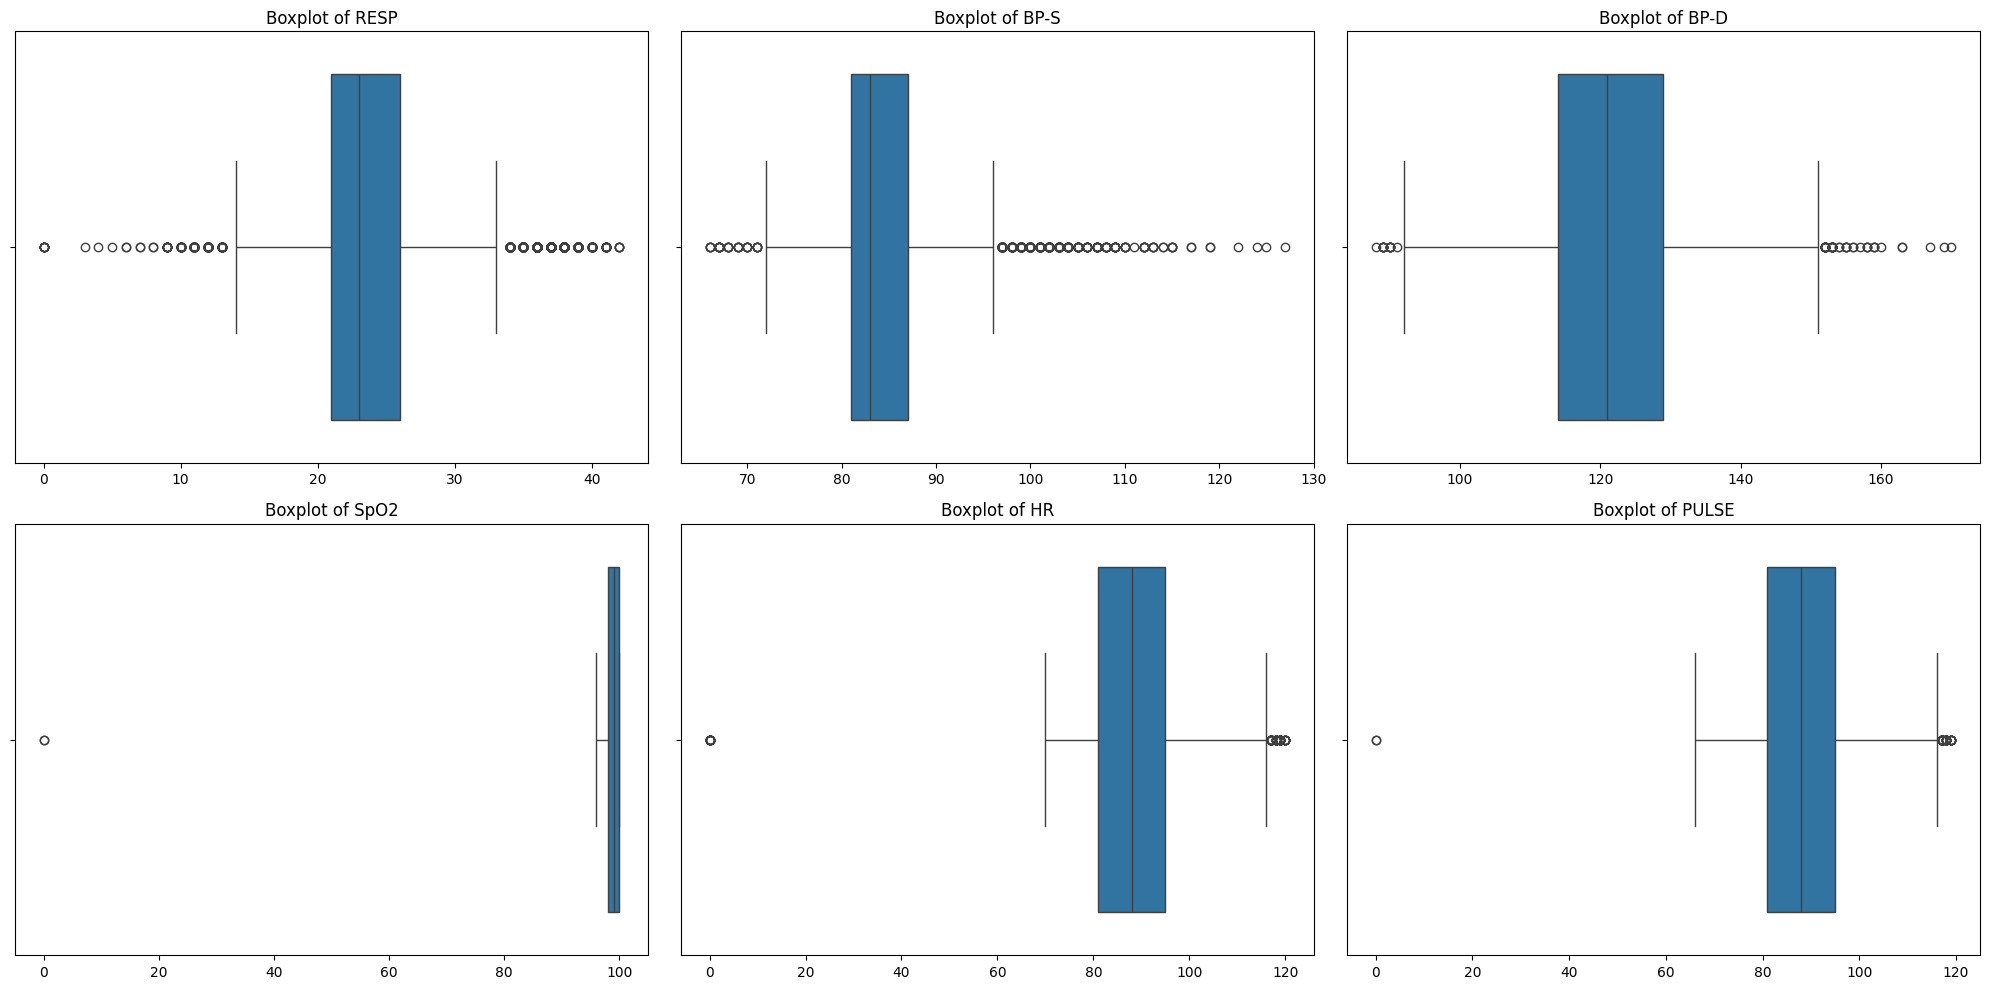

In [ ]:
plot_features(patient_221)

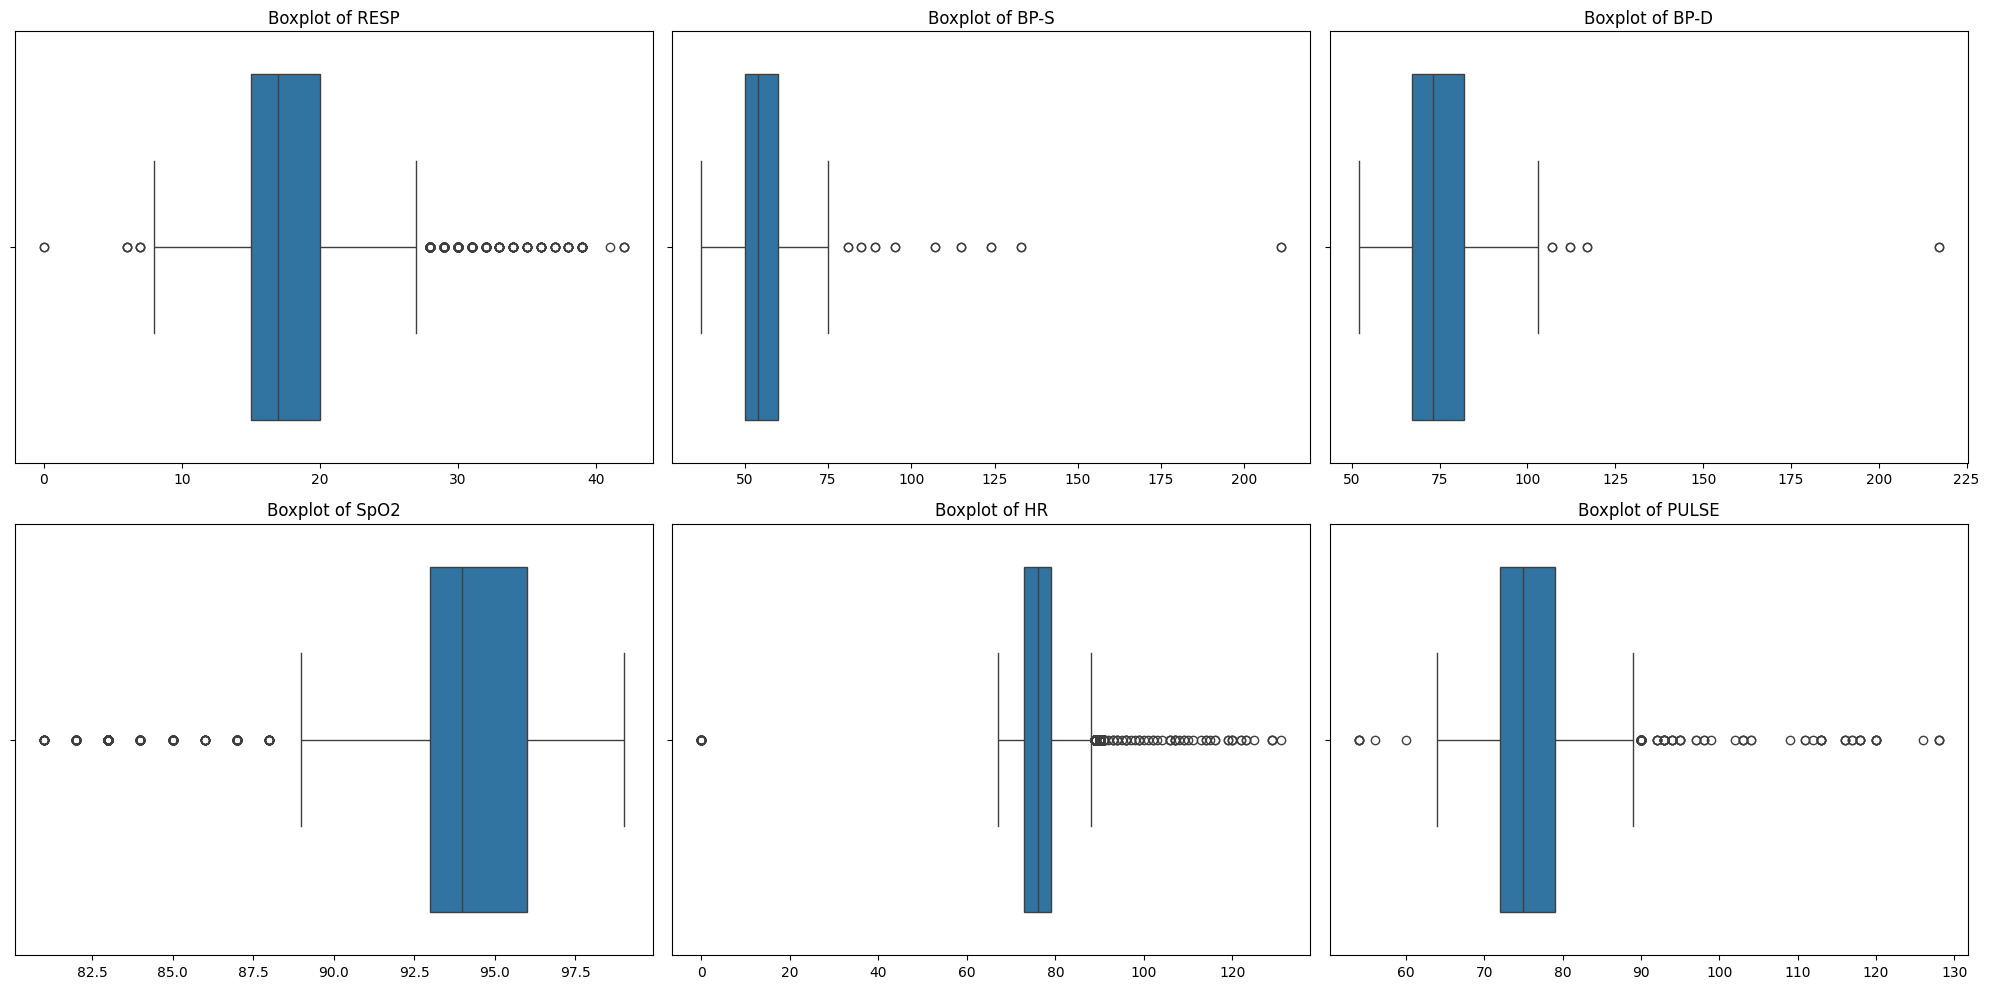

In [ ]:
plot_features(patient_230)

In [ ]:
patient_221['SpO2']

,SpO2
0,98
1,98
2,98
3,99
4,99
...,...
24994,99
24995,99
24996,99
24997,100


##Using Min Max Scaler to normalise the SpO2 levels

In [ ]:
#using min max scaler to normalise the SpO2 levels
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
patient_221['SpO2'] = scaler.fit_transform(patient_221[['SpO2']])
patient_230['SpO2'] = scaler.fit_transform(patient_230[['SpO2']])


## Implementing ID3 using the inbuilt functionality and making a function to evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# making a function to evaluate our tree
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=np.nan)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X = patient_221.drop('Anomaly', axis=1)
Y = patient_221['Anomaly']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
ID3 = tree.DecisionTreeClassifier(criterion='entropy')
ID3.fit(X_train, Y_train)
Y_pred = ID3.predict(X_test)


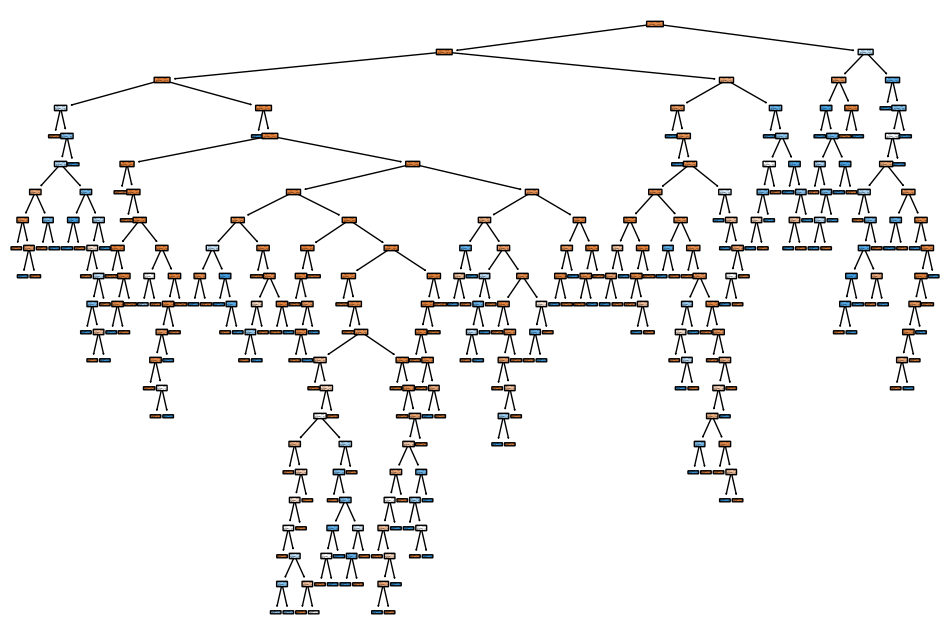

In [ ]:
plt.figure(figsize=(12,8))  # Adjust the figure size
tree.plot_tree(ID3, filled=True, feature_names=None, class_names=None,
               impurity=False, proportion=False, rounded=True, fontsize=0)
plt.show()

In [ ]:
evaluate_model(Y_test, Y_pred)

Accuracy: 0.9942
Precision: 0.9441
Recall: 0.9651
F1 Score: 0.9545
Confusion Matrix:
[[4667   18]
 [  11  304]]


###Writing a function to calculate total entropy of the dataset

In [ ]:
from collections import Counter
import math

#entropy
def entropy(y):
    freq = Counter(y)  #how many times occuring
    total = len(y)
    return -sum((count / total) * math.log2(count / total) for count in freq.values()) #formula implementation

In [ ]:
def information_gain(X, y, feature):
    total_entropy = entropy(y)  # E(S) - > full dataset entropy

    values = X[feature].unique()

    weighted_entropy = 0
    for value in values:
        subset_y = y[X[feature] == value]
        weighted_entropy += len(subset_y) / len(y) * entropy(subset_y)

    return total_entropy - weighted_entropy

In [ ]:
class DecisionTreeID3:
    def __init__(self):
        self.tree = None

    def fit(self, X, y):
        features = X.columns.tolist()
        self.tree = self._build_tree(X, y, features)

    def _build_tree(self, X, y, features):
        if len(set(y)) == 1:   #all same then lite
            return y.iloc[0]

        if len(features) == 0:
            return y.mode()[0]

        gains = [information_gain(X, y, feature) for feature in features]
        best_feature_idx = np.argmax(gains)
        best_feature = features[best_feature_idx]

        tree = {best_feature: {}} #node

        remaining_features = [f for f in features if f != best_feature] #best feature removed (since split hua uspe)

        for value in X[best_feature].unique():
            subset_X = X[X[best_feature] == value]
            subset_y = y[X[best_feature] == value]

            subtree = self._build_tree(subset_X, subset_y, remaining_features)
            tree[best_feature][value] = subtree

        return tree

    def predict_one(self, row, tree=None):
        if tree is None:
            tree = self.tree

        if not isinstance(tree, dict):
            return tree

        feature = next(iter(tree))
        value = row[feature]

        if value in tree[feature]:
            return self.predict_one(row, tree[feature][value])
        else:
            return None

    def predict(self, X):
        return X.apply(lambda row: self.predict_one(row), axis=1)


In [ ]:
X = patient_221.drop('Anomaly', axis=1)
Y = patient_221['Anomaly']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
id3=DecisionTreeID3()
id3.fit(X_train,Y_train)
y_pred=id3.predict(X_test)
accuracy = np.mean(y_pred ==Y_test)
print("Accuracy:", accuracy)

precision = np.mean(y_pred == Y_test)
print("Precision:", precision)

recall = np.mean(y_pred == Y_test)
print("Recall:", recall)


Accuracy: 0.9754
Precision: 0.9754
Recall: 0.9754


##Custom v/s Built in ID3
Hence we can infer that the custom ID3 lacks in accuracy and the built in is less prone to overfit as compared to custom

##Now using CART for patient_230

In [ ]:
#Using Sklearn Decion Tree Classifier for CART using criterion as gini
X = patient_230.drop('Anomaly', axis=1)
Y = patient_230['Anomaly']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
ID3 = tree.DecisionTreeClassifier(criterion='gini')
ID3.fit(X_train, Y_train)
Y_pred = ID3.predict(X_test)
evaluate_model(Y_test, Y_pred)

Accuracy: 0.9970
Precision: 0.9444
Recall: 0.9623
F1 Score: 0.9533
Confusion Matrix:
[[4832    9]
 [   6  153]]


In [ ]:
#Using Tfdf CART
X = patient_230.drop('Anomaly', axis=1)  # Features
Y = patient_230['Anomaly']               # Target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_train, Y_train], axis=1), label="Anomaly")
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_test, Y_test], axis=1), label="Anomaly")
model = tfdf.keras.CartModel()
model.fit(train_dataset)
# model.summary()
predictions = model.predict(test_dataset)

# Convert probabilities to class labels (0 or 1)
Y_pred = np.argmax(predictions, axis=1)
evaluate_model(Y_test, Y_pred)


Use /tmp/tmpjqsu_i4v as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.429284. Found 20000 examples.
Training model...
Model trained in 0:00:00.331569
Compiling model...
Model compiled.


5/5 [==============================] - 0s 21ms/step
Accuracy: 0.9664
Precision: nan
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[4832    0]
 [ 168    0]]


#Comparing both Sklearn CART and TFDF CART
#####The scikit-learn CART model provides significantly better performance in terms of detecting anomalies, with high precision and recall, and is well-suited for this dataset.
##### The TFDF CART model struggles with anomaly detection, particularly due to class imbalance, resulting in poor precision and recall.

ID3 vs CART
1. ID3 focuses on maximizing information gain, while CART uses Gini impurity or variance reduction. Information gain may provide more pure splits but can be more computationally intensive. Gini impurity is faster but may lead to more imprecise splits in some scenarios.

2. CART natively handles continuous variables through binary splits, making it more adaptable to datasets with numerical features. In contrast, ID3 requires preprocessing (binning) to handle continuous data.

3. ID3 can work well in cases where the features are categorical and a quick, interpretable decision tree is needed. However, the risk of overfitting and bias toward categorical features must be managed.

CART is often preferred due to its flexibility, pruning mechanism, and ability to generalize better. For smaller, well-defined problems with categorical features, ID3 can be a quick and efficient choice.



#Using Random Forest CLassifier on Patient 221

In [ ]:

#imported random forest from tensor flow and evaluated the model
X = patient_221.drop('Anomaly', axis=1)  # Features
Y = patient_221['Anomaly']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_train, Y_train], axis=1), label="Anomaly")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_test, Y_test], axis=1), label="Anomaly")
model = tfdf.keras.RandomForestModel()
model.fit(train_ds)
predictions = model.predict(test_ds)
Y_pred=np.argmax(predictions,axis=1)
print("Evaluating Random Forest")
evaluate_model(Y_test, Y_pred)
print(f"log loss is {log_loss(Y_test, predictions)}")

Use /tmp/tmpy2dhr7qj as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.371830. Found 19999 examples.
Training model...
Model trained in 0:00:04.704280
Compiling model...
Model compiled.
5/5 [==============================] - 0s 22ms/step
Evaluating Random Forest
Accuracy: 0.9390
Precision: nan
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[4695    0]
 [ 305    0]]
log loss is 0.017187577553631043


The zero value of the precision is due to data having excess 1 as compared to 0

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

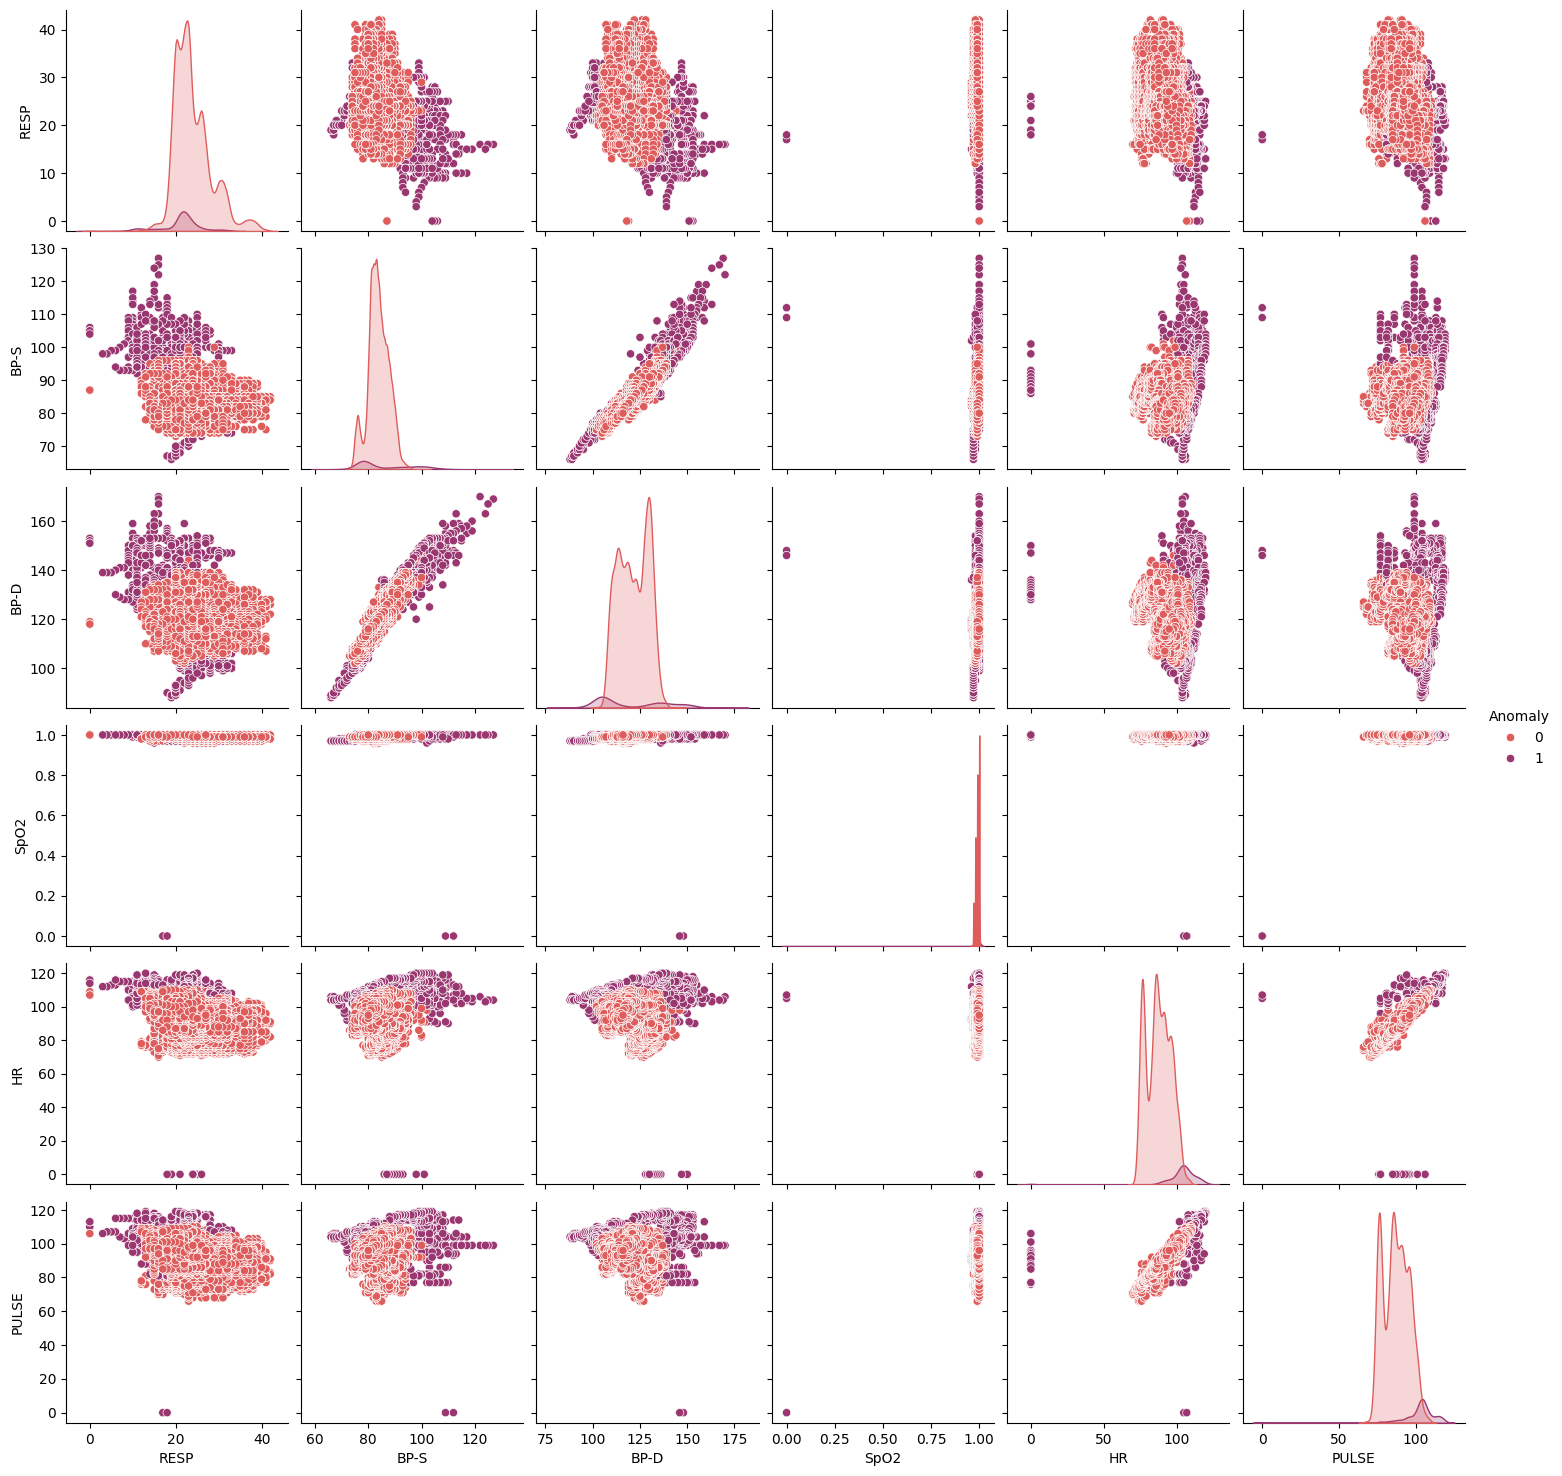

In [ ]:
import seaborn as sns
sns.pairplot(patient_221, hue='Anomaly',palette="flare")

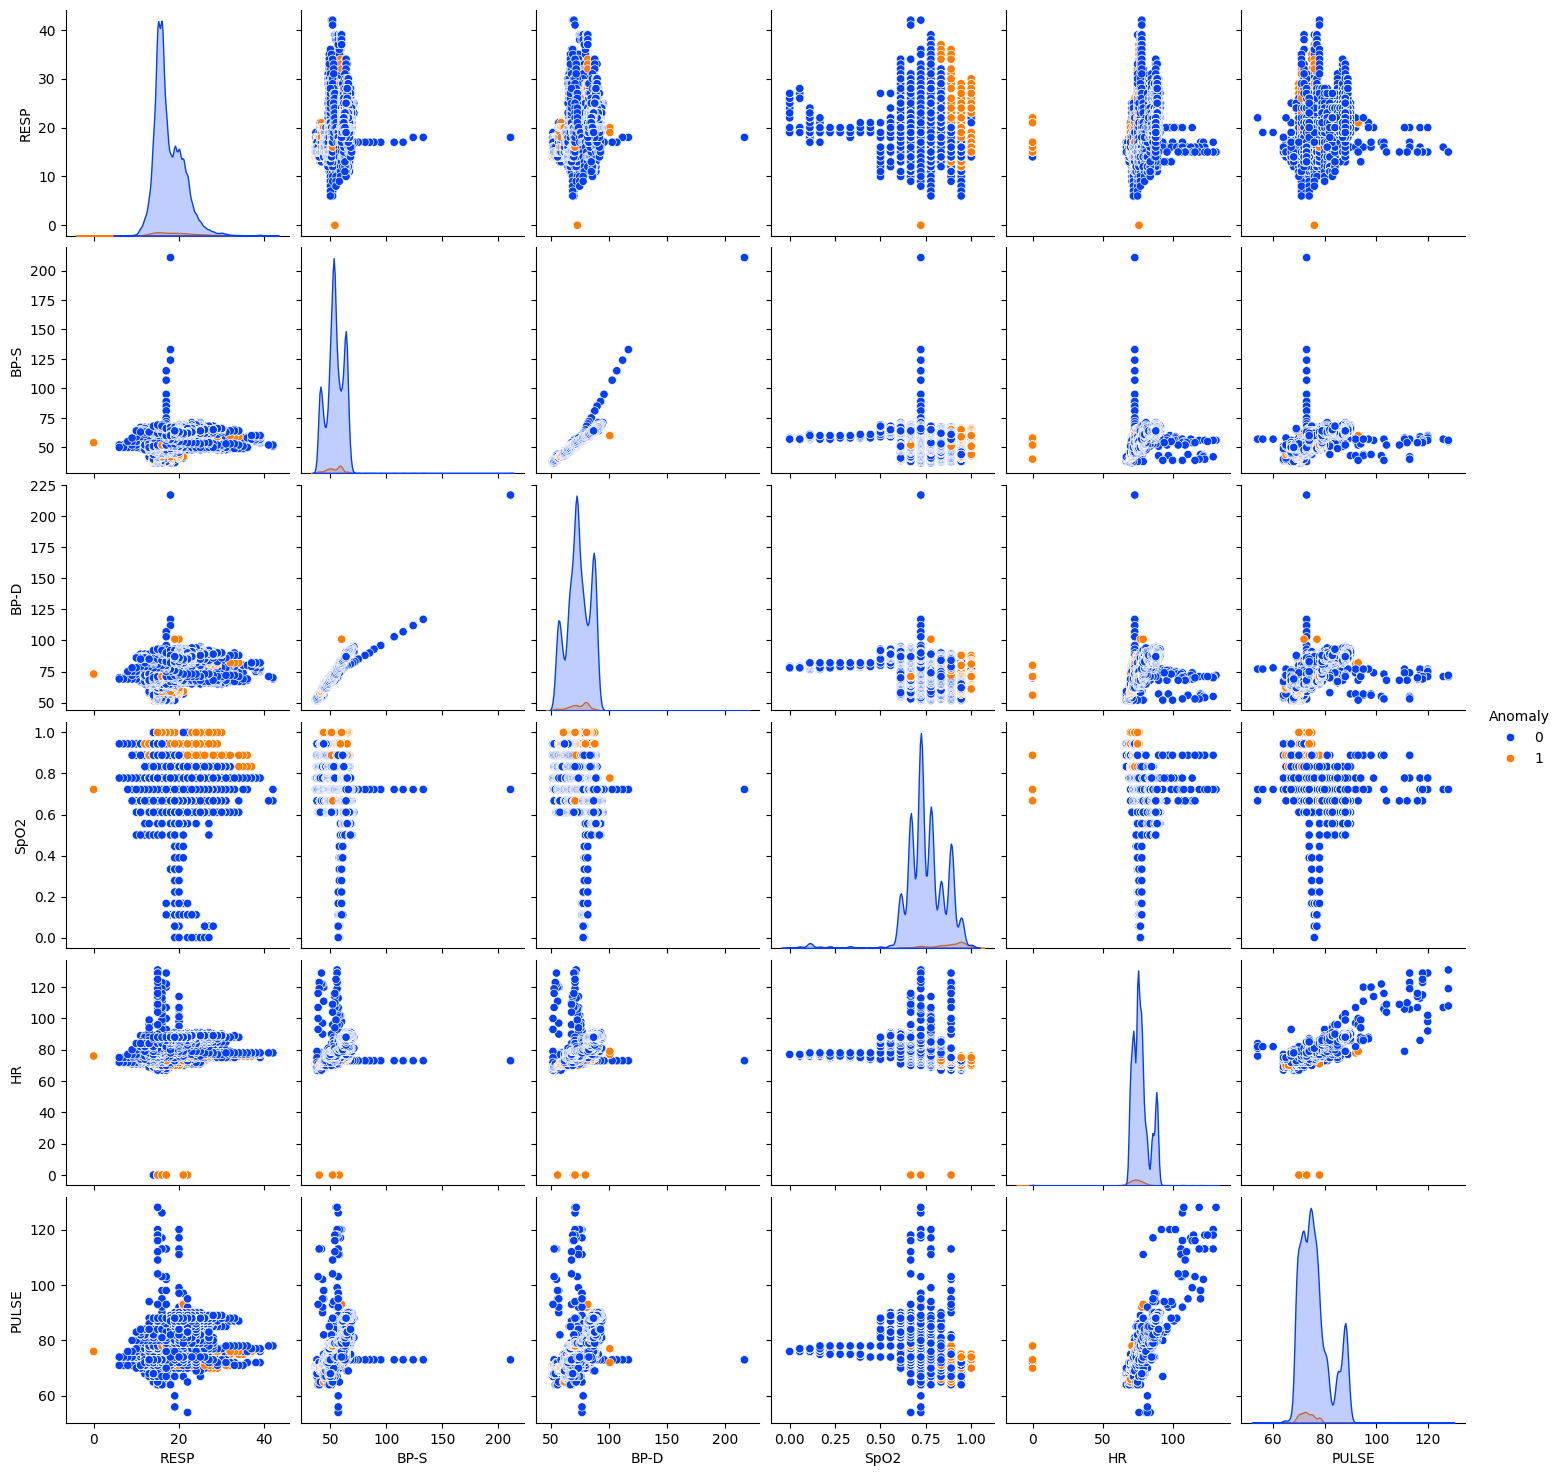

In [ ]:
sns.pairplot(patient_230, hue='Anomaly',palette="bright")

##Now using GBDT from tfdf

In [ ]:
from sklearn.metrics import log_loss, accuracy_score

X = patient_230.drop('Anomaly', axis=1)  # Features
Y = patient_230['Anomaly']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state=42)

train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_train, Y_train], axis=1), label="Anomaly")
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_test, Y_test], axis=1), label="Anomaly")
model_GBDT = tfdf.keras.GradientBoostedTreesModel()
model_GBDT.fit(train_dataset)
predictions = model_GBDT.predict(test_dataset)
log_loss_value = log_loss(Y_test, predictions)
print("Evaluating the GBDT model ")
print(f"Log Loss: {log_loss_value}")
evaluate_model(Y_test, np.argmax(predictions, axis=1))

Use /tmp/tmpop9czbyp as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.456886. Found 20000 examples.
Training model...
Model trained in 0:00:03.429493
Compiling model...
Model compiled.
5/5 [==============================] - 0s 10ms/step
Evaluating the GBDT model 
Log Loss: 0.013282494309835965
Accuracy: 0.9664
Precision: nan
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[4832    0]
 [ 168    0]]


Training model with 1 trees...
Use /tmp/tmpez__yzi3 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.698910. Found 20000 examples.
Training model...
Model trained in 0:00:00.104828
Compiling model...
Model compiled.
5/5 [==============================] - 0s 16ms/step
6868     0
24016    0
9668     0
13640    0
14018    0
        ..
8670     0
11839    0
4013     0
21147    0
695      0
Name: Anomaly, Length: 5000, dtype: int64
Training model with 6 trees...
Use /tmp/tmp159gitk1 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.724150. Found 20000 examples.
Training model...
Model trained in 0:00:00.217618
Compiling model...
Model compiled.
5/5 [==============================] - 0s 13ms/step
6868     0
24016    0
9668     0
13640    0
14018    0
        ..
8670     0
11839    0
4013     0
21147    0
695      0
Name: Anomaly, Length: 5000, dtype: int64
Training model with 11 trees...
Use /tmp/tmp0n9zka

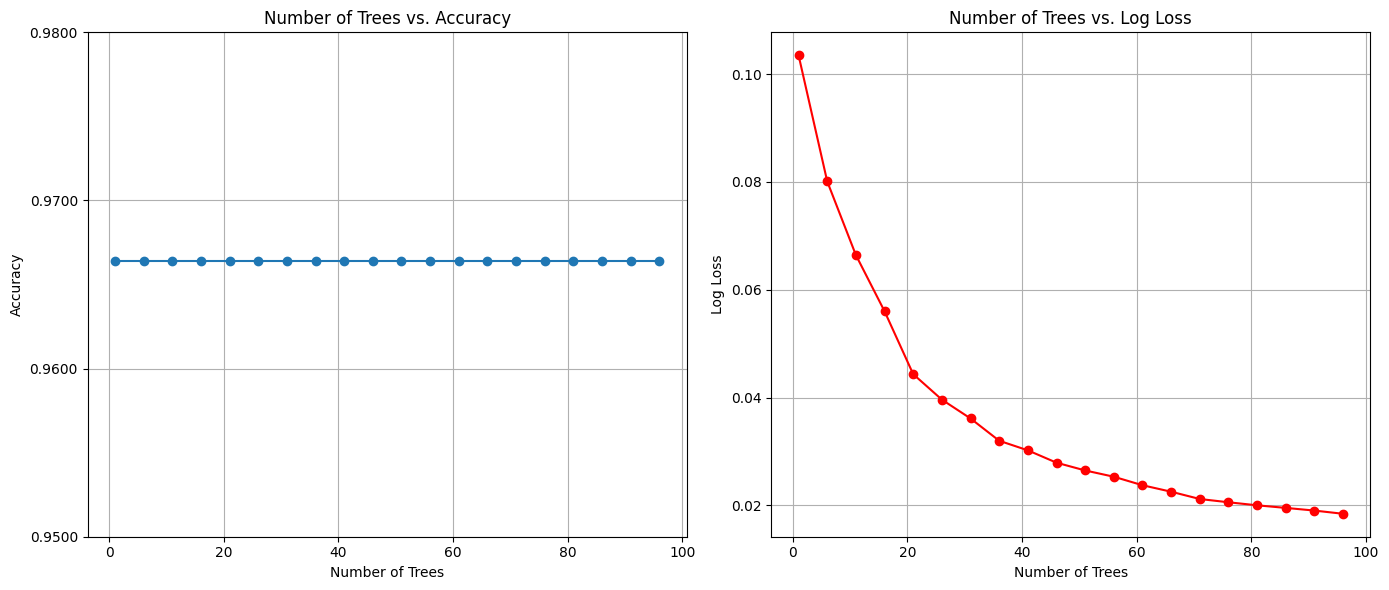

In [ ]:
from sklearn.metrics import log_loss, accuracy_score

X = patient_230.drop('Anomaly', axis=1)  # Features
Y = patient_230['Anomaly']               # Target

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state=42)

train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_train, Y_train], axis=1), label="Anomaly")
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_test, Y_test], axis=1), label="Anomaly")


num_trees_list = []
accuracy_list = []
log_loss_list = []
for num_trees in range(1, 100, 5):
    print(f"Training model with {num_trees} trees...")
    model_GBDT = tfdf.keras.GradientBoostedTreesModel(num_trees=num_trees)
    model_GBDT.fit(train_dataset)
    predictions = model_GBDT.predict(test_dataset)
    log_loss_value = log_loss(Y_test, predictions)
    predicted_classes = np.argmax(predictions, axis=1)
    accuracy_value = accuracy_score(Y_test, predicted_classes).astype(np.float128)
    print(Y_test)
    num_trees_list.append(num_trees)
    accuracy_list.append(accuracy_value)
    log_loss_list.append(log_loss_value)


print(accuracy_list)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.ylim(0.9500,0.9800)
plt.yticks(np.arange(0.9500, 0.9800, 0.01))
plt.plot(num_trees_list, accuracy_list, marker='o')
plt.title('Number of Trees vs. Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.4f}'))  # Format y-ticks

# Plot number of trees vs. log loss
plt.subplot(1, 2, 2)
plt.plot(num_trees_list, log_loss_list, marker='o', color='r')
plt.title('Number of Trees vs. Log Loss')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:

#Hence we can infer that GBDT has better accuracy than Random forest

#In both models, no true negatives (TN) are predicted, which  is evident
#from the presence of imbalanced classes where one class heavily dominates the other
# Despite this, GBDT shows a better ability to predict the positive class,
# reducing false negatives by nearly half compared to Random Forest

# GBDT outperforms Random Forest in both accuracy and log loss, indicating
# it makes better predictions, especially when well-tuned
# This is due to its ability to refine weak models iteratively, whereas
# Random Forest averages across trees, which might cause a loss of precision in some cases.


In [ ]:
#inportance feature in GBDT
importance_data=model_GBDT.make_inspector().variable_importances()
feature_importance = {feature[0]: feature[1] for feature in importance_data['SUM_SCORE']}

for feature, score in feature_importance.items():
    print(f"{feature}: {score}")

"HR" (1; #2): 418.5109566675845
"RESP" (1; #4): 257.37801018469384
"BP-S" (1; #1): 224.76338477186056
"SpO2" (1; #5): 221.52197425345096
"BP-D" (1; #0): 211.2008630742178
"PULSE" (1; #3): 157.4749392127164


In [ ]:
#importances in Random Forest
importance_data=model.make_inspector().variable_importances()
feature_importance = {feature[0]: feature[1] for feature in importance_data['SUM_SCORE']}

for feature, score in feature_importance.items():
    print(f"{feature}: {score}")

"HR" (1; #2): 569351.6238394058
"BP-D" (1; #0): 295574.03468900773
"PULSE" (1; #3): 216917.9294877421
"BP-S" (1; #1): 153292.7689102305
"SpO2" (1; #5): 135858.1369868703
"RESP" (1; #4): 49343.4378863803
